## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

######################################################################################################################

##### Pertubation Test (Logistic Regression)

In [5]:
#get correlation between features
data.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


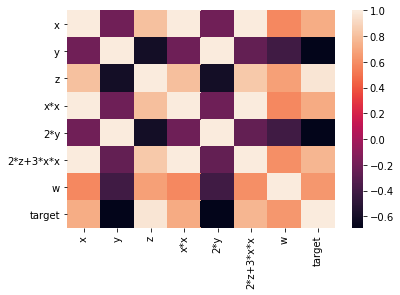

In [6]:
#correlation matrix heatmap
sns.heatmap(data.corr())

Based on the correlation heatmap above, we can see that x is highly correlated with x*x, y with 2*y and so on. This charateristic is pretty obvious since they are just slightly modified version of the original feature.

In [7]:
#find the best alpha for logistic regression
logistic_regression = SGDClassifier(loss="log",random_state = 7)
param = {"alpha" : [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(logistic_regression, param, cv=5)
clf.fit(X, Y)
clf.best_params_

{'alpha': 0.0001}

In [8]:
#create a model called best_model
best_model = SGDClassifier(loss="log",alpha=0.0001)
best_model.fit(X,Y)
y_pred = best_model.predict(X)
best_model_accuracy = accuracy_score(Y,y_pred)
best_model_coef = best_model.coef_

In [9]:
#modifying original data
X_new = X + 0.01
best_model.fit(X_new,Y)
y_pred = best_model.predict(X_new)
best_model_accuracy_edited = accuracy_score(Y,y_pred)
best_model_coef_edited = best_model.coef_

In [10]:
#compare result
print("LOGISTIC REGRESSION")
print("Original Accuracy = {}".format(best_model_accuracy))
print("Edited Accuracy = {}".format(best_model_accuracy_edited))
print("-"*80)
print("Original weight W =")
print(best_model_coef)
print("Edited weight W =")
print(best_model_coef_edited)
print("-"*80)
print("Deviations in Accuracy and Weight:")
print("Accuracy deviation = {}".format(best_model_accuracy-best_model_accuracy_edited))
print("W (weight) deviation:")
weight_deviation = np.abs(best_model_coef-best_model_coef_edited)
print(weight_deviation)
print("-"*80)
print("Top 4 features which have higher % change in weights compare to the other features:")
columns = list(data.columns)
for index in np.argsort(-weight_deviation).reshape(-1)[:4]:
    print(columns[index])


LOGISTIC REGRESSION
Original Accuracy = 1.0
Edited Accuracy = 1.0
--------------------------------------------------------------------------------
Original weight W =
[[ 8.48542147 -9.10271288 11.3568772   8.87678657 -9.10271288  9.3603305
   6.58219582]]
Edited weight W =
[[ 10.74427154 -15.58557544  24.93441848   8.72045411 -15.58557544
   10.85756235   5.95863344]]
--------------------------------------------------------------------------------
Deviations in Accuracy and Weight:
Accuracy deviation = 0.0
W (weight) deviation:
[[ 2.25885007  6.48286256 13.57754128  0.15633245  6.48286256  1.49723186
   0.62356238]]
--------------------------------------------------------------------------------
Top 4 features which have higher % change in weights compare to the other features:
z
y
2*y
x


Based on the summary above, we can see that the weight changes drastically before and after noise is added to the data. This indicates that there is multicolinearity in the data. It is important to note that multicolinearity does not affect models accuracy (as shown above). It does, however, affect the ability to accurately 

##### Pertubation Test (Linear SVM)

In [11]:
linear_SVM = SGDClassifier(loss="hinge",random_state = 7)
param = {"alpha" : [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(linear_SVM, param, cv=5)
clf.fit(X, Y)
clf.best_params_

{'alpha': 1e-05}

In [12]:
#create a model called best_model
best_model_SVM = SGDClassifier(loss="log",alpha=0.00001)
best_model_SVM.fit(X,Y)
y_pred = best_model_SVM.predict(X)
best_model_accuracy_SVM = accuracy_score(Y,y_pred)
best_model_coef_SVM = best_model_SVM.coef_

In [13]:
#modifying original data
X_new = X + 0.01
best_model_SVM.fit(X_new,Y)
y_pred = best_model_SVM.predict(X_new)
best_model_accuracy_edited_SVM = accuracy_score(Y,y_pred)
best_model_coef_edited_SVM = best_model_SVM.coef_

In [14]:
#compare result
print("LINEAR SVM")
print("Original Accuracy = {}".format(best_model_accuracy_SVM))
print("Edited Accuracy = {}".format(best_model_accuracy_edited_SVM))
print("-"*80)
print("Original weight W =")
print(best_model_coef_SVM)
print("Edited weight W =")
print(best_model_coef_edited_SVM)
print("-"*80)
print("Deviations in Accuracy and Weight:")
print("Accuracy deviation = {}".format(best_model_accuracy_SVM-best_model_accuracy_edited_SVM))
print("W (weight) deviation:")
weight_deviation = np.abs(best_model_coef_SVM-best_model_coef_edited_SVM)
print(weight_deviation)
print("-"*80)
print("Top 4 features which have higher % change in weights compare to the other features:")
columns = list(data.columns)
for index in np.argsort(-weight_deviation).reshape(-1)[:4]:
    print(columns[index])


LINEAR SVM
Original Accuracy = 1.0
Edited Accuracy = 1.0
--------------------------------------------------------------------------------
Original weight W =
[[ 10.78707214 -12.15260434  13.91198864  11.3911608  -12.15260434
   11.93177473  -2.35828202]]
Edited weight W =
[[ 27.38163769 -18.41674525  56.64972584  26.06691492 -18.41674525
   30.29522195  11.67445059]]
--------------------------------------------------------------------------------
Deviations in Accuracy and Weight:
Accuracy deviation = 0.0
W (weight) deviation:
[[16.59456555  6.26414091 42.7377372  14.67575412  6.26414091 18.36344722
  14.03273261]]
--------------------------------------------------------------------------------
Top 4 features which have higher % change in weights compare to the other features:
z
2*z+3*x*x
x
x*x
